In [259]:
import pandas as pd
import pytz
import datetime as dt
import math
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['path.simplify'] = False
import matplotlib.pyplot as plt

In [260]:
time_zone = 'Europe/Berlin'
tz = pytz.timezone(time_zone)

In [270]:
psychopy_file_path = "/home/muhammad/Desktop/Datasets/data_sony_digiRelax/pilot_study/VP001_251023/Psychopy_data/VP001_251023_DigiRelax_Experiment_2023-10-25_09h16.01.523.csv"
skin_shimmer_file_path =  "/home/muhammad/Desktop/Datasets/data_sony_digiRelax/pilot_study/VP001_251023/Shimmer_data/2023-10-25_07.34.27_VP001_251023_SD_Session1/VP001_251023_Session1_Shimmer_FBA7_Calibrated_SD.csv"
hr_shimmer_file_path = "/home/muhammad/Desktop/Datasets/data_sony_digiRelax/pilot_study/VP001_251023/Shimmer_data/2023-10-25_07.34.27_VP001_251023_SD_Session1/VP001_251023_Session1_Shimmer_8108_Calibrated_SD.csv"

In [271]:
#psychopy_file_path = "/home/muhammad/Desktop/Datasets/data_sony_digiRelax/pilot_study/VP002_261023/Psychopy_data/VP002_261023_DigiRelax_Experiment_2023-10-26_10h12.28.142.csv"
#skin_shimmer_file_path =  "/home/muhammad/Desktop/Datasets/data_sony_digiRelax/pilot_study/VP002_261023/Shimmer_data/2023-10-26_08.29.09_VP002_261023_SD_Session1/VP002_261023_Session1_Shimmer_FBA7_Calibrated_SD.csv"
#hr_shimmer_file_path = "/home/muhammad/Desktop/Datasets/data_sony_digiRelax/pilot_study/VP002_261023/Shimmer_data/2023-10-26_08.29.09_VP002_261023_SD_Session1/VP002_261023_Session1_Shimmer_8108_Calibrated_SD.csv"

In [272]:
def read_manipulate_psychopy(psychopy_path):
    
    psychopy_df = pd.read_csv(psychopy_path)
    col_list = [col for col in psychopy_df.columns if col.endswith('_ts')]
    col_list.insert(0, "Reference_time")
    psychopy_df_selected = psychopy_df[col_list]
    
    return psychopy_df_selected    


def read_shimmer_sensor(sensor_file_path):
    
    shimmer_df = pd.read_csv(sensor_file_path, sep='\t', low_memory=False)
    shimmer_df = shimmer_df.reset_index()
    shimmer_df.columns = shimmer_df.iloc[0]
    shimmer_df.drop([0, 1], axis=0, inplace=True)
    shimmer_df=shimmer_df.reset_index(drop=True)

    
    return shimmer_df

def standardize_timestamps_shimmer(shimmer_df, timestamps_col_name):
    
    timesstamps_list = shimmer_df[timestamps_col_name].to_list()
    new_timestamps_list = [float(val)/1000 for val in  timesstamps_list]
    
    shimmer_df[timestamps_col_name] = new_timestamps_list
    
    return shimmer_df

def get_nonNan_list_psychopy(psychopy_df, col_name):
    
    
    selected_vals=[val for val in psychopy_df[col_name].to_list() if not(math.isnan(val))]
    
    return selected_vals
    
    

In [273]:
psychopy_df = read_manipulate_psychopy(psychopy_file_path)

In [274]:
psychopy_df

,Reference_time,sam_e_ts,sam_a_ts,saliva_probe_1_ts,change_room_ts,tsst_prep_ts,tsst_end_ts,tsst_end_exp_ts,saliva_probe_2_ts,saliva_probe_3_ts,saliva_probe_4_ts,final_instruction_ts
0,1.698218e+09,1.698218e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.698218e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.698220e+09,NaN,1.698219e+09,1.698219e+09,1.698219e+09,1.698220e+09,1.698220e+09,NaN,NaN,NaN,NaN
3,NaN,NaN,1.698220e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.698221e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.698220e+09,NaN,NaN,NaN
5,NaN,NaN,1.698221e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.698221e+09,NaN,NaN
7,NaN,1.698222e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,1.698222e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.698222e+09,1.698222e+09


## Cols of interest for skin resistance = Shimmer_FBA7_Timestamp_Unix_CAL, Shimmer_FBA7_GSR_Skin_Conductance_CAL, Shimmer_FBA7_GSR_Skin_Resistance_CAL

In [275]:
skin_resis_shimmer_df = read_shimmer_sensor(skin_shimmer_file_path)
skin_resis_shimmer_df = standardize_timestamps_shimmer(skin_resis_shimmer_df, "Shimmer_FBA7_Timestamp_Unix_CAL")
skin_col_interest  = ["Shimmer_FBA7_Timestamp_Unix_CAL", "Shimmer_FBA7_GSR_Skin_Resistance_CAL"]
skin_resis_shimmer_df_selected =skin_resis_shimmer_df[skin_col_interest]


## Cols of interest for ecg = Shimmer_8108_Timestamp_Unix_CAL, Shimmer_8108_ECG_LL-LA_24BIT_CAL	

In [276]:
hr_shimmer_df = read_shimmer_sensor(hr_shimmer_file_path)
hr_shimmer_df  = standardize_timestamps_shimmer(hr_shimmer_df, "Shimmer_8108_Timestamp_Unix_CAL")
col_interest= ["Shimmer_8108_Timestamp_Unix_CAL", "Shimmer_8108_ECG_LL-LA_24BIT_CAL"]
hr_shimmer_df_selected = hr_shimmer_df[col_interest]

In [277]:
events_list = ["Reference_time", "saliva_probe_1_ts", "change_room_ts", "tsst_prep_ts", "tsst_end_ts", "tsst_end_exp_ts", "saliva_probe_2_ts", "saliva_probe_3_ts","saliva_probe_4_ts"]


hr_all_events_list=[]
timestamps_all_events_list = []
corr_event_list = []



for ind, event in enumerate(events_list):
    
    if ind ==0:
        
        last_event = event
        last_event_timestamp = get_nonNan_list_psychopy(psychopy_df, last_event)[0]
    else:
        current_event = event
        
        current_event_timestamp = get_nonNan_list_psychopy(psychopy_df, current_event)[0]
        
        hr_start_change_roonm_df=hr_shimmer_df_selected[(hr_shimmer_df_selected["Shimmer_8108_Timestamp_Unix_CAL"]>= last_event_timestamp) & (hr_shimmer_df_selected["Shimmer_8108_Timestamp_Unix_CAL"] <= current_event_timestamp)]
        
        hr_list=hr_start_change_roonm_df[col_interest[1]].values
        
        hr_list =[float(val) for val in hr_list]
        
        ts_list = hr_shimmer_df_selected["Shimmer_8108_Timestamp_Unix_CAL"].values
        
        
        hr_all_events_list.append(hr_list)
        timestamps_all_events_list.append(ts_list)
        corr_event_list.append(event)
        
        last_event = event
        last_event_timestamp = get_nonNan_list_psychopy(psychopy_df, last_event)[0]
        

    



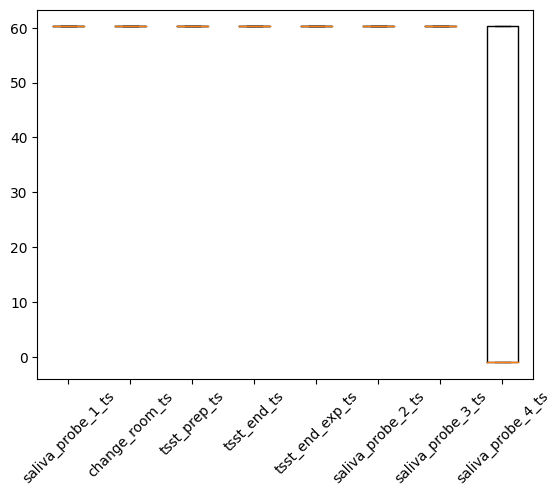

In [278]:
plt.boxplot(hr_all_events_list)
plt.xticks([1,2,3,4,5,6,7,8], corr_event_list)
plt.xticks(rotation = 45)
plt.show()


[]